In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pds

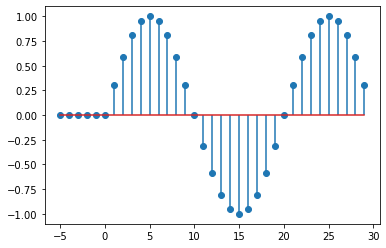

In [2]:
# Oscilador

w0 = 2 * np.pi / 20 # rad/amostras
n = np.arange(-5, 30)
x = pds.delta(n)
b = np.array([0, np.sin(w0)])
a = np.array([1, -2*np.cos(w0), 1])
h = pds.lfilter(b, a, x)

plt.stem(n, h);

In [3]:
y = np.sin(w0 * n) * pds.u(n)

pds.mse(y, h)

3.0793067631635462e-30

## Verificacao por respostas aos impulsos

In [4]:
n = np.arange(-5, 30)
x = pds.delta(n)

### 1

Polos = ±2 j

Zeros = 0; 1

In [5]:
a1 = np.array([1, 0, 4], dtype=np.float64)
b1 = np.array([1, -1, 0], dtype=np.float64)

print("Polos:", np.roots(a1))
print("Zeros:", np.roots(b1))

Polos: [-0.+2.j  0.-2.j]
Zeros: [1. 0.]


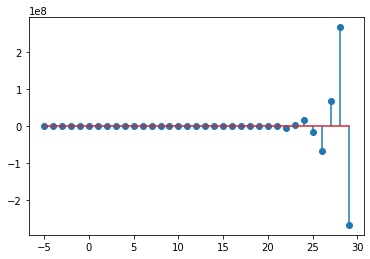

In [6]:
h1 = pds.lfilter(b1, a1, x)

plt.stem(n, h1);

### 2

Polos = 0

Zeros = ± j

In [7]:
a2 = np.array([1], dtype=np.float64)
b2 = np.array([1, 0, 1], dtype=np.float64)

print("Polos:", np.roots(a2))
print("Zeros:", np.roots(b2))

Polos: []
Zeros: [-0.+1.j  0.-1.j]


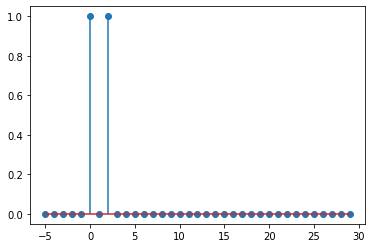

In [8]:
h2 = pds.lfilter(b2, a2, x)

plt.stem(n, h2);

### 3

Polos = 1/2

Zeros = ±1/2 

In [9]:
a3 = np.array([1, -1/2.])
b3 = np.array([1, 0, -1/4.])

print("Polos:", np.roots(a3))
print("Zeros:", np.roots(b3))

Polos: [0.5]
Zeros: [-0.5  0.5]


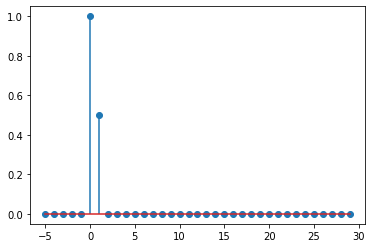

In [10]:
h3 = pds.lfilter(b3, a3, x)

plt.stem(n, h3);

In [11]:
import pds.system
import pandas as pd

systems = [(a1, b1), (a2, b2), (a3, b3)]

systems_table = {}

for i, (a, b) in enumerate(systems):
    properties = pds.system.classification(a, b)
    systems_table['H{}(z)'.format(i)] = properties

df = pd.DataFrame.from_dict(systems_table, orient='index')
df['Polos'] = df['Polos'].apply(np.round, args=(3,))
df['Zeros'] = df['Zeros'].apply(np.round, args=(3,))

df

,Polos,Zeros,FIR/IIR?,Recursivo?,Causal?,Estável?
H0(z),"[(-0+2j), -2j]","[1.0, 0.0]",IIR,Sim,Sim,Não
H1(z),[],"[(-0+1j), -1j]",FIR,Não,Não,Sim
H2(z),[],[-0.5],FIR,Sim,Não,Sim
